### Gliederung

* [Bibliotheken](#Bibliotheken)
* [Deskriptive und explorative Datenanalyse](#DEskriptive-und-explorative-Datenanalyse)
 * [Korrelation](#Korrelation)
* [Eigene Implementierung der Logistischen Regression](#Eigene-Implementierung-der-logistischen-Regression)
 * [Feature scaling](#Feature-scaling)
 * [Logistische Regression](#Logistische-Regression)
 * [Ergebnisse](#Ergebnisse)
* [Verwenden der Bibliothek Sklearn](#Verwenden-der-Bibliothek-Sklearn)
 * [Feature scaling sklearn](#Feature-scaling-sklearn)
 * [Logistische Regression sklearn](#Logistische-Regression-sklearn)
     * [Parameter Optimierung](#Parameter-Optimierung)
     * [ROC und Confusion Matrix](#ROC-und-Confusion-Matrix)
     * [Ergebnisse LR](#Ergebnisse-LR)
 * [PCA](#PCA)
     * [Ergebnisse PCA](#Ergebnisse-PCA)
 * [Random Forest](#Random-Forest)
     * [Paramter Optimierung RF](#Paramter-Optimierung-RF)
     * [Ergebnisse RF](#Ergebnisse-RF)
+ [Zusammenfassung der Ergebnisse von LR und RF](#Zusammenfassung-der-Ergebnisse-von-LR-und-RF)
* [Evaluation auf der Testmenge](#Evaluation-auf-der-Testmenge)
* [Literaturverzeichnis](#Literaturverzeichnis)


# Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import KFold,train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve, recall_score, precision_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Deskriptive und explorative Datenanalyse

In [2]:
pd.set_option('max_columns', None) # damit wir alle features sehen
data_frame = pd.read_csv("train.csv", encoding="utf-8")
data_frame

,id,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.1599,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,926125,1,20.92,25.09,143.00,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
438,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
439,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
440,926954,1,16.60,28.08,108.30,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [3]:
data_frame.info()
print("Data shape: \t", data_frame.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      442 non-null    int64  
 1   label   442 non-null    int64  
 2   f0      442 non-null    float64
 3   f1      442 non-null    float64
 4   f2      442 non-null    float64
 5   f3      442 non-null    float64
 6   f4      442 non-null    float64
 7   f5      442 non-null    float64
 8   f6      442 non-null    float64
 9   f7      442 non-null    float64
 10  f8      442 non-null    float64
 11  f9      442 non-null    float64
 12  f10     442 non-null    float64
 13  f11     442 non-null    float64
 14  f12     442 non-null    float64
 15  f13     442 non-null    float64
 16  f14     442 non-null    float64
 17  f15     442 non-null    float64
 18  f16     442 non-null    float64
 19  f17     442 non-null    float64
 20  f18     442 non-null    float64
 21  f19     442 non-null    float64
 22  f2

In [4]:
df = data_frame.drop(['id'],axis=1)

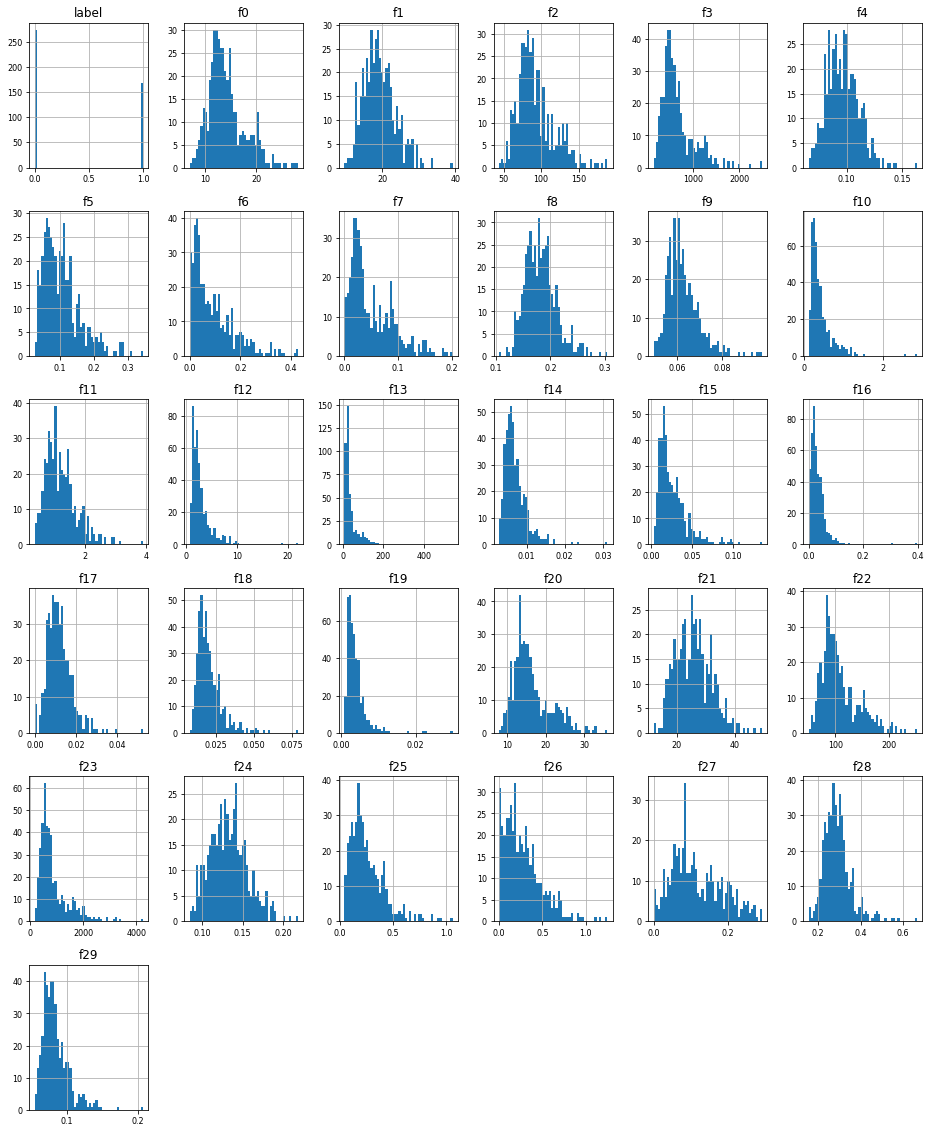

In [5]:
_ = df.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [6]:
df.describe()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.380090,14.198149,19.286923,92.473145,662.228054,0.096684,0.105688,0.091386,0.050323,0.181797,0.062767,0.413017,1.218003,2.913189,41.649484,0.007090,0.025840,0.032231,0.011945,0.020703,0.003810,16.360414,25.737376,107.952466,891.382127,0.132538,0.256704,0.275239,0.116520,0.290896,0.083858
std,0.485959,3.582889,4.344557,24.730714,361.670190,0.014352,0.054488,0.082968,0.040456,0.028636,0.007195,0.291939,0.516414,2.101522,48.936737,0.003023,0.018234,0.031277,0.006116,0.008361,0.002767,4.901376,6.194365,34.123935,584.484246,0.023070,0.161562,0.213038,0.067570,0.064502,0.018695
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.065760,0.026500,0.000000,0.000000,0.106000,0.049960,0.114400,0.362100,0.771400,7.254000,0.002826,0.003012,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.084090,0.043270,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.770000,16.187500,75.677500,427.475000,0.086140,0.063945,0.028535,0.019795,0.161425,0.057682,0.233950,0.844900,1.612500,18.067500,0.005215,0.013702,0.015093,0.007902,0.015200,0.002218,13.060000,21.085000,84.492500,518.700000,0.115400,0.144575,0.114425,0.065035,0.249200,0.070895
50%,0.000000,13.465000,18.835000,87.090000,560.100000,0.096165,0.096790,0.066140,0.034190,0.179750,0.061365,0.321750,1.119000,2.311000,24.700000,0.006399,0.020305,0.026140,0.011100,0.018795,0.003116,15.105000,25.470000,98.855000,702.500000,0.131250,0.215700,0.229000,0.101600,0.282700,0.080015
75%,1.000000,15.745000,21.802500,103.700000,780.400000,0.106250,0.130475,0.132250,0.077543,0.196925,0.066202,0.483175,1.477500,3.350250,45.262500,0.008161,0.032932,0.043103,0.015058,0.023830,0.004547,18.540000,29.885000,124.750000,1041.750000,0.146250,0.336450,0.385300,0.165100,0.318275,0.092102
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.896000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


Total number of data in class 0: 	 274
Total number of data in class 1: 	 168


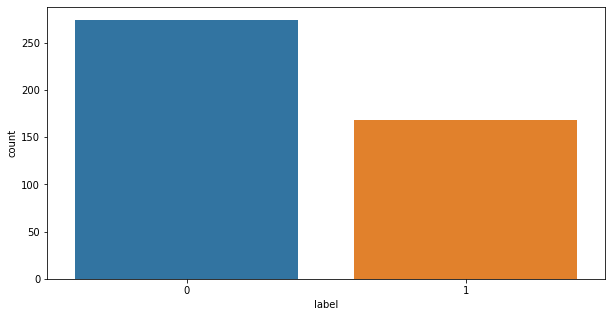

In [7]:
label_data = df['label']
plt.figure(figsize=(10,5))
seaborn.countplot(x=label_data, label='count')
print("Total number of data in class 0: \t", (label_data == 0).sum())
print("Total number of data in class 1: \t", (label_data == 1).sum())

## Korrelation

In [8]:
correlations = df.drop("label", axis=1).corr()

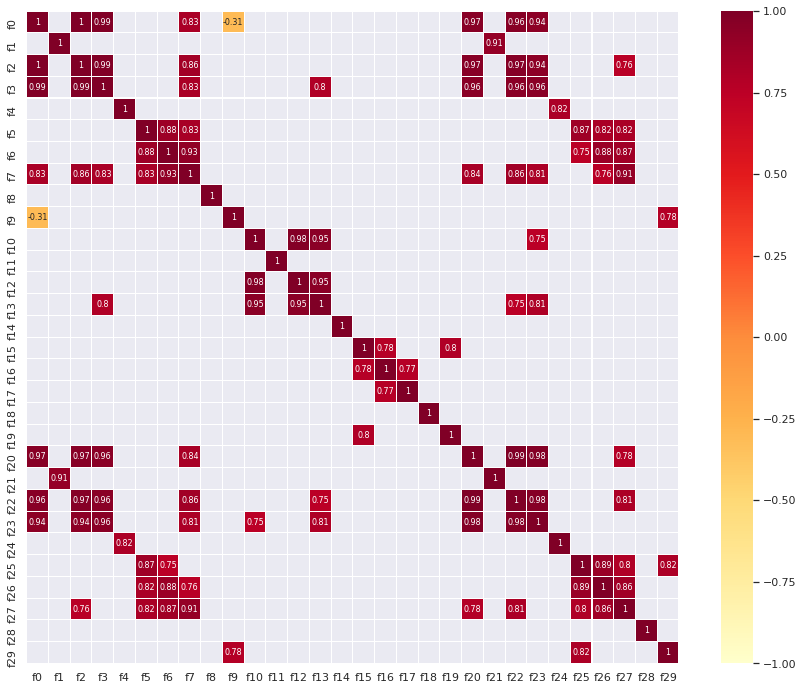

In [9]:
seaborn.set(rc={'figure.figsize':(15,12)})
_ = seaborn.heatmap(correlations[(correlations >= 0.75) | (correlations <= -0.3)], 
                cmap="YlOrRd", vmax=1.0, vmin=-1.0, linewidths=0.1, 
               annot=True, annot_kws={"size":8}, square=True)

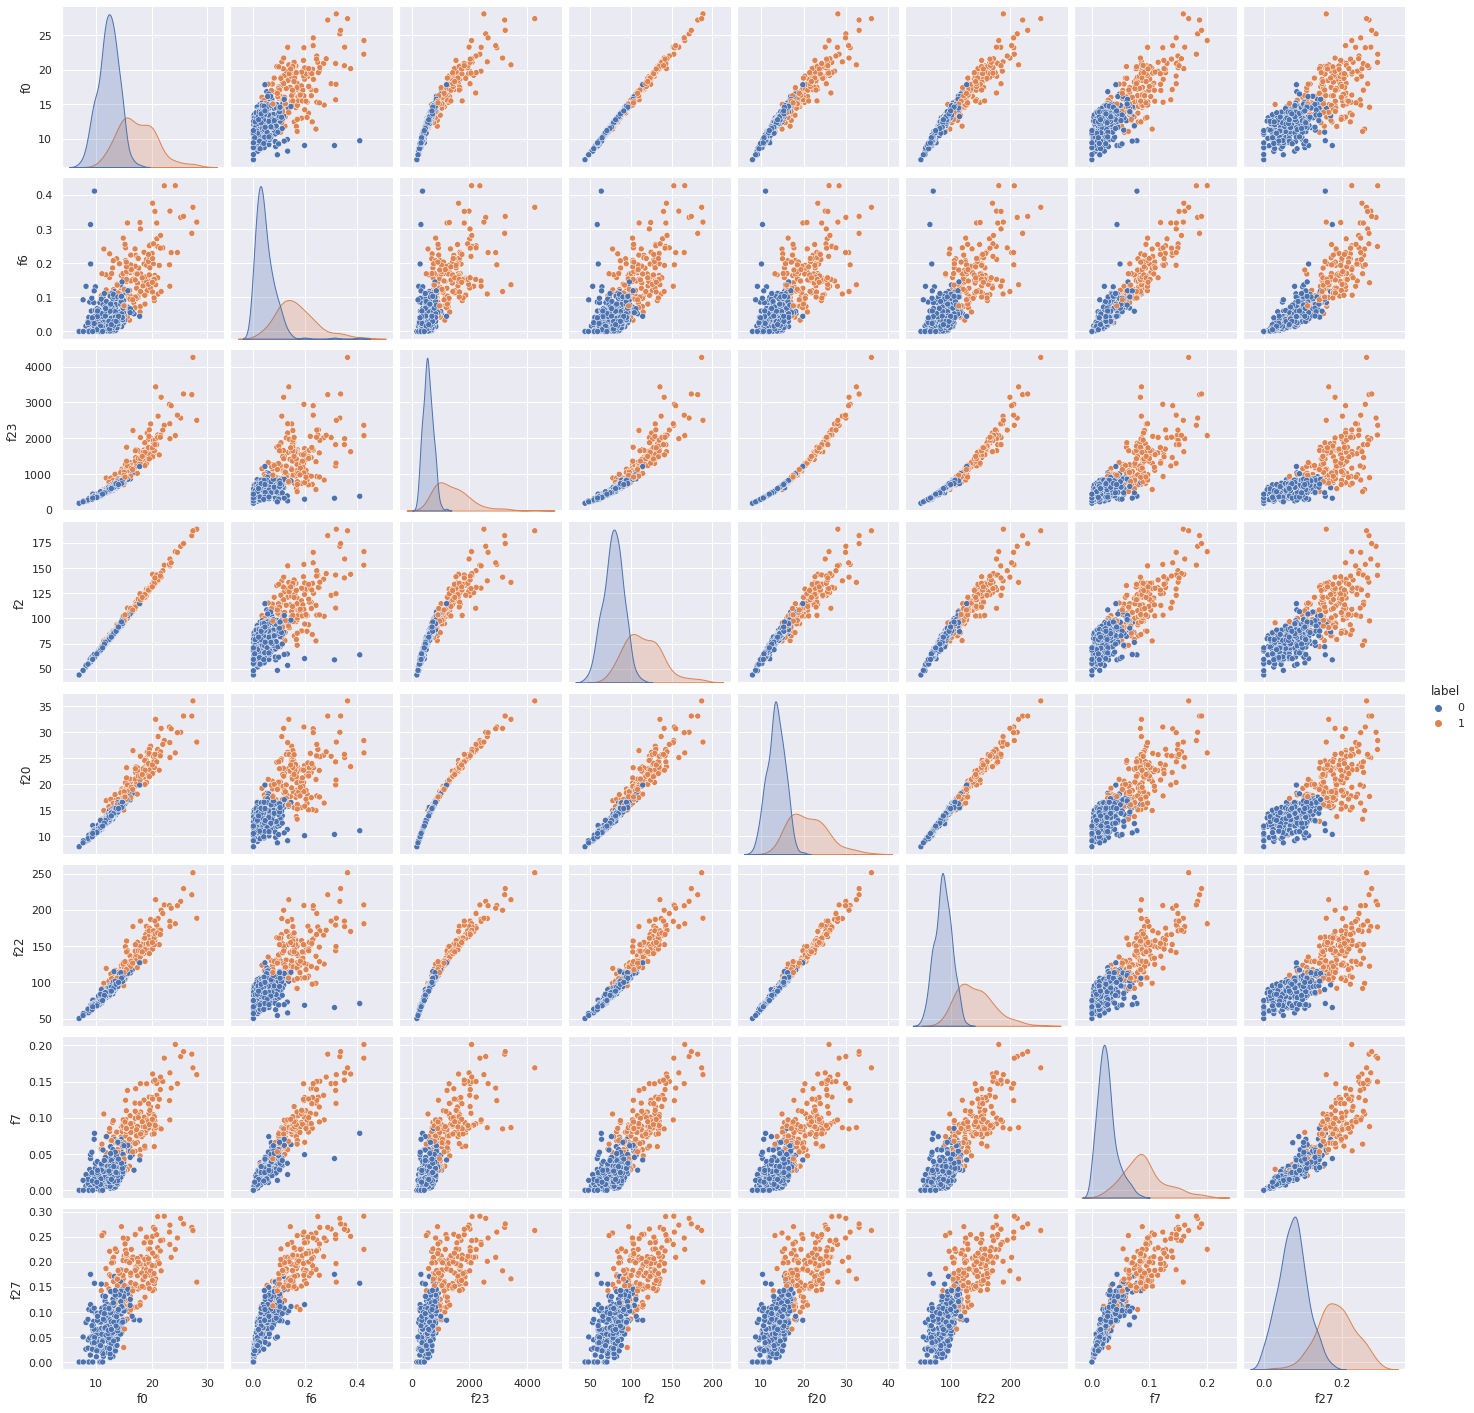

In [10]:
strong_corr = pd.DataFrame(df[['label','f0', 'f6', 'f23', 'f2', 'f20','f22','f7','f27']])
_ = seaborn.pairplot(strong_corr, 
                 hue='label')

In [11]:
df_less = df.drop(['f0'],axis=1)
df_less = df_less.drop(['f22'],axis=1)
df_less = df_less.drop(['f2'],axis=1)
df_less = df_less.drop(['f20'],axis=1)
df_less

,label,f1,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f21,f23,f24,f25,f26,f27,f28,f29
0,1,10.38,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,21.25,1203.0,0.10960,0.1599,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,20.38,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,14.34,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,15.70,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,23.75,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1,25.09,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,29.41,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
438,1,22.39,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,26.40,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
439,1,28.25,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,38.25,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
440,1,28.08,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,34.12,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


# Eigene Implementierung der logistischen Regression

In [12]:
# extract label data (class 0 or 1)
y = df.label.values
# create X (drop label)
X = df.drop(['label'],axis=1).values
print("y shape: \t", y.shape)
print("X shape: \t", X.shape)

# das selbe für df_less
y_less = df_less.label.values
X_less = df_less.drop(['label'],axis=1).values
print("y_less shape: \t", y_less.shape)
print("X_less shape: \t", X_less.shape)

y shape: 	 (442,)
X shape: 	 (442, 30)
y_less shape: 	 (442,)
X_less shape: 	 (442, 26)


In [13]:
# y in test,val,train
y_split_less = np.array_split(y_less,6)

y_train_less = np.concatenate((y_split_less[3],y_split_less[5],y_split_less[2]))
y_val_less = np.concatenate((y_split_less[0],y_split_less[4]))
y_test_less = y_split_less[1]
print("y_train_less shape: \t", y_train_less.shape)
print("y_val_less shape: \t", y_val_less.shape)
print("y_test_less shape: \t", y_test_less.shape)


#  X in test,val,train
X_split_less = np.array_split(X_less,6)

X_train_less = np.concatenate((X_split_less[3],X_split_less[5],X_split_less[2]))
X_val_less = np.concatenate((X_split_less[0],X_split_less[4]))
X_test_less = X_split_less[1]
print("X_train_less shape: \t", X_train_less.shape)
print("X_val_less shape: \t", X_val_less.shape)
print("X_test_less shape: \t", X_test_less.shape)

y_train_less shape: 	 (221,)
y_val_less shape: 	 (147,)
y_test_less shape: 	 (74,)
X_train_less shape: 	 (221, 26)
X_val_less shape: 	 (147, 26)
X_test_less shape: 	 (74, 26)


In [14]:
y_split = np.array_split(y,6)
y_train = np.concatenate((y_split[3],y_split[5],y_split[2]))
y_val = np.concatenate((y_split[0],y_split[4]))
y_test = y_split[1]
print("y_train shape: \t", y_train.shape)
print("y_val shape: \t", y_val.shape)
print("y_test shape: \t", y_test.shape)

X_split = np.array_split(X,6)
X_train = np.concatenate((X_split[3],X_split[5],X_split[2]))
X_val = np.concatenate((X_split[0],X_split[4]))
X_test = X_split[1]
print("X_train shape: \t", X_train.shape)
print("X_val shape: \t", X_val.shape)
print("X_test shape: \t", X_test.shape) 

y_train shape: 	 (221,)
y_val shape: 	 (147,)
y_test shape: 	 (74,)
X_train shape: 	 (221, 30)
X_val shape: 	 (147, 30)
X_test shape: 	 (74, 30)


In [15]:
print("Less features")
print("Total number of data in class 0 (train): \t", (y_train_less == 0).sum())
print("Total number of data in class 1 (train): \t", (y_train_less == 1).sum())
print("Total number of data in class 0 (val): \t", (y_val_less == 0).sum())
print("Total number of data in class 1 (val): \t", (y_val_less == 1).sum())
print("Total number of data in class 0 (test): \t", (y_test_less == 0).sum())
print("Total number of data in class 1 (test): \t", (y_test_less == 1).sum())
print("All features")
print("Total number of data in class 0 (train): \t", (y_train == 0).sum())
print("Total number of data in class 1 (train): \t", (y_train == 1).sum())
print("Total number of data in class 0 (val): \t", (y_val == 0).sum())
print("Total number of data in class 1 (val): \t", (y_val == 1).sum())
print("Total number of data in class 0 (test): \t", (y_test == 0).sum())
print("Total number of data in class 1 (test): \t", (y_test == 1).sum())

Less features
Total number of data in class 0 (train): 	 150
Total number of data in class 1 (train): 	 71
Total number of data in class 0 (val): 	 78
Total number of data in class 1 (val): 	 69
Total number of data in class 0 (test): 	 46
Total number of data in class 1 (test): 	 28
All features
Total number of data in class 0 (train): 	 150
Total number of data in class 1 (train): 	 71
Total number of data in class 0 (val): 	 78
Total number of data in class 1 (val): 	 69
Total number of data in class 0 (test): 	 46
Total number of data in class 1 (test): 	 28


## Feature scaling

In [16]:
# all features
feature_mean = X_train.mean(axis=0)
feature_std = X_train.std(axis=0)

X_train_scaled = (X_train - feature_mean)/(feature_std)
X_val_scaled = (X_val - feature_mean)/(feature_std)
X_test_scaled = (X_test - feature_mean)/(feature_std)


# less features
feature_mean = X_train_less.mean(axis=0)
feature_std = X_train_less.std(axis=0)

X_train_scaled_less = (X_train_less - feature_mean)/(feature_std)
X_val_scaled_less = (X_val_less - feature_mean)/(feature_std)
X_test_scaled_less = (X_test_less - feature_mean)/(feature_std)

## Logistische Regression

y_train_less shape: 	 (221,)
y_val_less shape: 	 (147,)
y_test_less shape: 	 (74,)
X_train_less shape: 	 (221, 26)
X_val_less shape: 	 (147, 26)
X_test_less shape: 	 (74, 26)
------------------------------------------------------------------
Best combination between low out of sample error and high accuracy
------------------------------------------------------------------
Learning Rate:	 0.1
Number of iterations:	 10000
Lambda Regression:	 0.5
Threshold:	 0.5
Thetas:	 [ 0.   2.  -1.5  4.   0.   0.   1.  -3.5  2.2  4.3  2.   0.6  0.4 -3.
  3.   3.   6.   3.   0.   2.  -1.  -3.   0.5  3.   1.   3.   5. ]


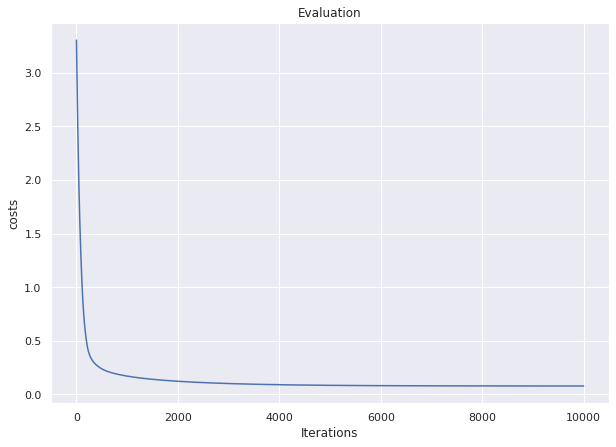

Costs before the training:	 3.304055997092894
Costs after the training:	 0.07828411030199847
Final Thetas:	 [-0.70024471 -0.21775163  1.09286091  0.39426923 -0.41660006  0.78642767
  1.08974991 -0.36273822 -0.18829727  1.95084202 -0.10941136  0.72660256
  1.12204822  0.02663518 -0.52754926  0.20269957  0.44463575 -0.44835968
 -0.51597241  1.37582225  1.38533188  0.30294964 -0.18176033  1.03703482
  0.63882421  0.98840258  0.26609568]
Out of sample Error	 0.1953059110860277
Validation Error: 0.1953059110860277 +- 0.08247860988423225
Accuracy with test data
LR Accuracy %: 	 95.94594594594594
-------------------------------------------------
Confusion matrix for threshold = 	 0.5
[[45  1]
 [ 2 26]]
-------------------------------------------------
True positive 	 45
True negative 	 26
False negative 	 2
False postive 	 1
Accuracy % 	 95.94594594594594
Precision % 	 97.82608695652173
Recall (Sensitivity) % 	 95.74468085106383


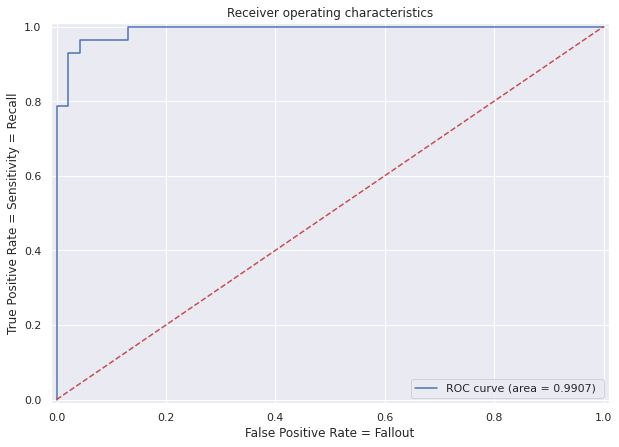

In [17]:
%run log_reg_less_features.py

y_train shape: 	 (221,)
y_val shape: 	 (147,)
y_test shape: 	 (74,)
X_train shape: 	 (221, 30)
X_val shape: 	 (147, 30)
X_test shape: 	 (74, 30)
------------------------------------------------------------------
Best combination between low out of sample error and high accuracy
------------------------------------------------------------------
Learning Rate:	 0.1
Number of iterations:	 10000
Lambda Regression:	 0.5
Threshold:	 0.5
Thetas:	 [ 0.   2.  -1.5  4.   0.   0.   1.  -3.5  2.2  4.3  2.   0.6  0.4 -3.
  3.   3.   6.   3.   0.   2.  -1.  -3.   0.5  3.   1.   3.   5.   0.1
  2.   4.   0. ]


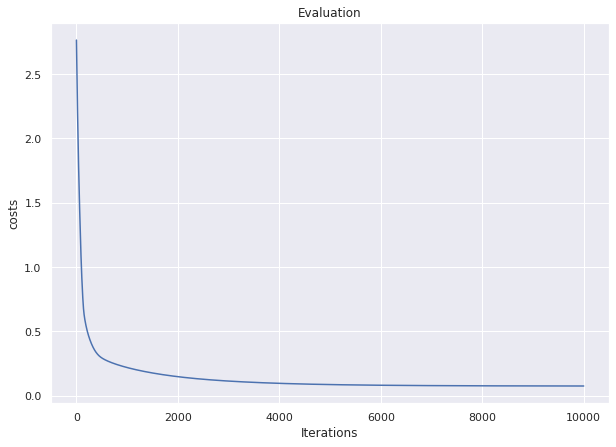

Costs before the training:	 2.764687268826348
Costs after the training:	 0.07598687758422047
Final Thetas:	 [-0.75342594  0.36206015 -0.09224734  0.56344295  0.33922537  0.1982874
 -0.55034735  0.43124584  1.03065302 -0.16650206  0.24033558  1.75125447
  0.09780157  0.64517025  1.30223866  0.07369491 -0.57772987  0.34138637
  0.28589713 -0.39041583 -0.5289594   0.45268596  1.16524835  0.80982255
  0.95733256  0.51924763  0.06581384  0.882471    0.6003913   0.82971603
  0.07521387]
Out of sample Error	 0.1757999523843198
Validation Error: 0.1757999523843198 +- 0.08247860988423225
Accuracy with test data
LR Accuracy %: 	 95.94594594594594
-------------------------------------------------
Confusion matrix for threshold = 	 0.5
[[45  1]
 [ 2 26]]
-------------------------------------------------
True positive 	 45
True negative 	 26
False negative 	 2
False postive 	 1
Accuracy % 	 95.94594594594594
Precision % 	 97.82608695652173
Recall (Sensitivity) % 	 95.74468085106383


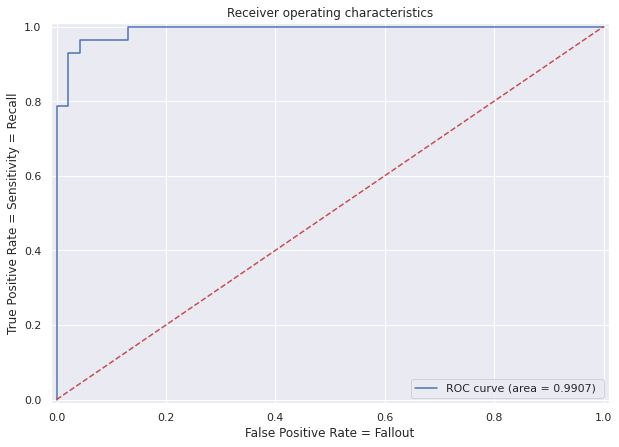

In [18]:
%run log_reg_all_features.py

In [19]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_predicted = model.predict(X_test_scaled)

print("Logisitic Regression Model of sklearn with all features")
print("-------------------------------------------------------")
print("Accuracy with validation data %\t", accuracy_score(y_test,y_predicted)*100)

# confusion matrix
print("Confusion matrix:")
cm = confusion_matrix(y_test,y_predicted)
print(cm)


print("\n")

model_2 = LogisticRegression()
model_2.fit(X_train_scaled_less,y_train_less)
y_predicted_less = model_2.predict(X_test_scaled_less)

print("Logisitic Regression Model of sklearn with less features")
print("--------------------------------------------------------")
print("Accuracy with validation data %\t", accuracy_score(y_test_less,y_predicted_less)*100)

# confusion matrix
print("Confusion matrix:")
cm = confusion_matrix(y_test_less,y_predicted)
print(cm)

Logisitic Regression Model of sklearn with all features
-------------------------------------------------------
Accuracy with validation data %	 95.94594594594594
Confusion matrix:
[[45  1]
 [ 2 26]]


Logisitic Regression Model of sklearn with less features
--------------------------------------------------------
Accuracy with validation data %	 95.94594594594594
Confusion matrix:
[[45  1]
 [ 2 26]]


# Verwenden der Bibliothek Sklearn

In [10]:
y = df['label'].copy()
X = df.drop('label', axis=1).copy()

In [11]:
random_state = 0

# splitting the data into 75% train and 25% testing data
# train data used for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=random_state)
print("X_train.shape: \t", X_train.shape)
print("X_test.shape: \t", X_test.shape)

print("Total number of data in class 0 (train): \t", (y_train == 0).sum())
print("Total number of data in class 1 (train): \t", (y_train == 1).sum())
print("Total number of data in class 0 (test): \t", (y_test == 0).sum())
print("Total number of data in class 1 (test): \t", (y_test == 1).sum())

X_train.shape: 	 (331, 30)
X_test.shape: 	 (111, 30)
Total number of data in class 0 (train): 	 215
Total number of data in class 1 (train): 	 116
Total number of data in class 0 (test): 	 59
Total number of data in class 1 (test): 	 52


## Feature scaling sklearn

In [12]:
# feature scaling to avoid data leakage in test data 
# first apply to train data an use it for test data
scaler = StandardScaler().fit(X_train)


X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [13]:
# Mean around 0?
X_train_scaled.mean()

f0     5.323452e-16
f1    -3.112649e-16
f2    -3.980155e-16
f3     1.664496e-16
f4    -4.819911e-16
f5    -1.978947e-16
f6     7.127565e-18
f7    -7.991258e-17
f8     8.901909e-16
f9     9.341302e-16
f10   -1.603283e-16
f11    6.834077e-17
f12    1.554648e-16
f13   -3.689563e-17
f14   -1.341659e-17
f15    9.592864e-17
f16   -9.106512e-17
f17    2.072864e-16
f18    2.309331e-16
f19    1.955468e-16
f20   -1.534942e-16
f21    4.922212e-16
f22   -8.070500e-16
f23    9.500625e-17
f24    8.784514e-16
f25   -2.347904e-17
f26   -6.171633e-17
f27    4.561641e-17
f28    1.019661e-16
f29   -1.811240e-16
dtype: float64

In [14]:
# standard variance close to 1?
X_train_scaled.std()

f0     1.001514
f1     1.001514
f2     1.001514
f3     1.001514
f4     1.001514
f5     1.001514
f6     1.001514
f7     1.001514
f8     1.001514
f9     1.001514
f10    1.001514
f11    1.001514
f12    1.001514
f13    1.001514
f14    1.001514
f15    1.001514
f16    1.001514
f17    1.001514
f18    1.001514
f19    1.001514
f20    1.001514
f21    1.001514
f22    1.001514
f23    1.001514
f24    1.001514
f25    1.001514
f26    1.001514
f27    1.001514
f28    1.001514
f29    1.001514
dtype: float64

## Logistische Regression sklearn

In [15]:
def print_score(y_test,y_pred):
    print("Accuracy %: \t", accuracy_score(y_test,y_pred)*100)
    print("Recall %: \t", recall_score(y_test,y_pred)*100)
    print("Precision %: \t", precision_score(y_test,y_pred)*100)

In [16]:
def print_score_cv(accuracy,precision,recall):
    print("Mean Accuracy %:\t", accuracy.mean()*100)
    print("Mean Recall %:\t", recall.mean()*100)
    print("Mean Precision %:\t", precision.mean()*100)

In [17]:
print("Standard LR without CV\n")
log_model_standard = LogisticRegression()
log_model_standard.fit(X_train_scaled,y_train)
y_predicted_standard = log_model_standard.predict(X_test_scaled)

print("Confusion Matrix:")
cm_standard = confusion_matrix(y_test,y_predicted_standard)
print(cm_standard)

print_score(y_test,y_predicted_standard)

Standard LR without CV

Confusion Matrix:
[[57  2]
 [ 1 51]]
Accuracy %: 	 97.2972972972973
Recall %: 	 98.07692307692307
Precision %: 	 96.22641509433963


In [18]:
print("Standard LR with CV\n")
random_state=0
nb_folds = 4

cv = StratifiedKFold(n_splits=nb_folds,shuffle=True,random_state=0)

pipe_std = Pipeline([('scaler', StandardScaler()),('lr_std', LogisticRegression())])
accuracy = cross_val_score(pipe_std, X_train, y_train, scoring='accuracy', cv=cv)
precision = cross_val_score(pipe_std, X_train, y_train, scoring="precision",cv=cv)
recall = cross_val_score(pipe_std, X_train, y_train, scoring="recall",cv=cv)
print_score_cv(accuracy,precision,recall)

Standard LR with CV

Mean Accuracy %:	 95.7610931531002
Mean Recall %:	 90.51724137931035
Mean Precision %:	 97.2051282051282


### Parameter Optimierung

In [19]:
pipe = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression())])

param_grid = {
    'log_reg__penalty' : ['l1','l2'],
    'log_reg__C' : [0.0001,0.001,0.01,0.05,0.1,0.5,1,5,10],
    'log_reg__solver': ['liblinear','lbfgs'],
    'log_reg__max_iter': [100,500,1000,5000]
} 

gridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, 
                          scoring='accuracy', cv=cv,
                    return_train_score=True , verbose=True, n_jobs=-1)


gridSearch.fit(X_train,y_train)

# getting best estimator
log_reg_best = gridSearch.best_estimator_

# getting the best parameters
best_para = gridSearch.best_params_
print("The best parameters are: \t", best_para)
print("Best Score %: \t", gridSearch.best_score_*100)
pd.DataFrame(gridSearch.cv_results_).loc[:, ['mean_test_score', 'rank_test_score', 'params']].sort_values(by='rank_test_score').head()

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s


The best parameters are: 	 {'log_reg__C': 0.5, 'log_reg__max_iter': 100, 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}
Best Score %: 	 96.6683808404349


[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:    2.4s finished


,mean_test_score,rank_test_score,params
87,0.966684,1,"{'log_reg__C': 0.5, 'log_reg__max_iter': 500, ..."
95,0.966684,1,"{'log_reg__C': 0.5, 'log_reg__max_iter': 5000,..."
91,0.966684,1,"{'log_reg__C': 0.5, 'log_reg__max_iter': 1000,..."
83,0.966684,1,"{'log_reg__C': 0.5, 'log_reg__max_iter': 100, ..."
66,0.966574,5,"{'log_reg__C': 0.1, 'log_reg__max_iter': 100, ..."


In [20]:
print("Optimised LR without CV\n")

lr_best = LogisticRegression(C=0.5,penalty='l2',solver='lbfgs',max_iter=100) 
lr_best.fit(X_train_scaled,y_train)
y_pred = lr_best.predict(X_test_scaled)

print("Confusion Matrix:")
cm = confusion_matrix(y_test,y_pred)
print(cm)

print_score(y_test,y_pred)

Optimised LR without CV

Confusion Matrix:
[[57  2]
 [ 1 51]]
Accuracy %: 	 97.2972972972973
Recall %: 	 98.07692307692307
Precision %: 	 96.22641509433963


In [21]:
print("Optimised LR with CV\n")


pipe_opt = Pipeline([('scaler', StandardScaler()),('lr_opt', LogisticRegression(C=0.5,penalty='l2',solver='lbfgs',max_iter=100))])
accuracy = cross_val_score(pipe_opt, X_train, y_train, scoring='accuracy', cv=cv)
precision = cross_val_score(pipe_opt, X_train, y_train, scoring="precision",cv=cv)
recall = cross_val_score(pipe_opt, X_train, y_train, scoring="recall",cv=cv)
print_score_cv(accuracy,precision,recall)

Optimised LR with CV

Mean Accuracy %:	 96.6683808404349
Mean Recall %:	 91.37931034482759
Mean Precision %:	 99.16666666666667


### ROC und Confusion Matrix

In [22]:
def plot_my_roc_curve(fpr,tpr,y_test,y_prob):
    roc_auc = roc_auc_score(y_test,y_prob)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.6f) " % roc_auc)
    plt.plot(fpr,tpr,color='orange')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()    

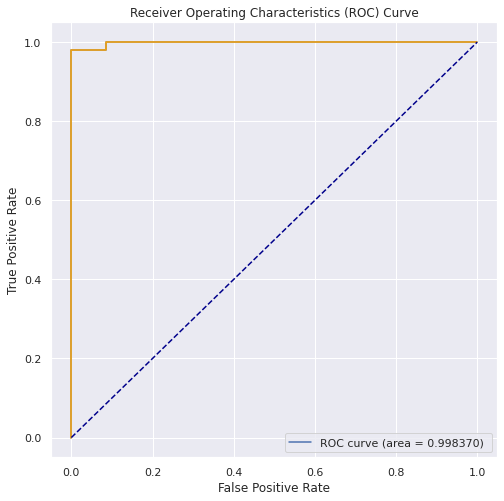

AUC Score: 	 0.9983702737940026
TPR: 	 [0.         0.01923077 0.98076923 0.98076923 1.         1.        ]
FPR: 	 [0.         0.         0.         0.08474576 0.08474576 1.        ]


In [23]:
proba_lr_class_1 = lr_best.predict_proba(X_test_scaled)[:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, proba_lr_class_1)
plot_my_roc_curve(fpr_lr,tpr_lr,y_test,proba_lr_class_1)
print("AUC Score: \t", roc_auc_score(y_test, proba_lr_class_1))
print("TPR: \t", tpr_lr)
print("FPR: \t", fpr_lr)

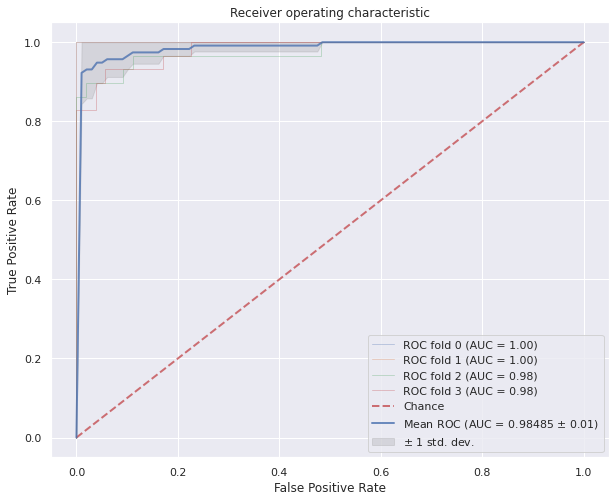

In [24]:
# plot roc crurve with cross validation
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
pipe_lr_best = Pipeline([('scaler', StandardScaler()), 
                         ('log_reg', LogisticRegression(C=0.5,penalty='l2',
                                                        solver='liblinear'))])

X_train_ = X_train.values
y_train_ = y_train.values
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10,8))
for i, (train, test) in enumerate(cv.split(X_train_, y_train_)):
    pipe_lr_best.fit(X_train_[train], y_train_[train])
    viz = plot_roc_curve(pipe_lr_best, X_train_[test], y_train_[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.5f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()

## PCA


In [25]:
n_components = 11 
pca = PCA(n_components=n_components)
pca.fit(X_train_scaled)

pc_train = pd.DataFrame(pca.transform(X_train_scaled), 
                        columns=['PC ' + str(i + 1) for i in range(n_components)])
pc_test = pd.DataFrame(pca.transform(X_test_scaled), 
                        columns=['PC ' + str(i + 1) for i in range(n_components)])

In [26]:
pc_train

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11
0,5.094592,-1.517554,-1.749463,0.326333,-1.841944,-0.817298,0.696677,0.732170,-0.006117,0.705082,0.621550
1,-3.744051,0.929822,2.312763,-0.684366,-0.776542,1.085055,-1.090354,0.871951,1.173958,1.199865,-1.630635
2,-1.713067,1.419746,-0.038781,2.317822,-1.077065,1.300871,-0.060886,0.563917,0.835469,-0.127861,-1.317570
3,5.067609,-4.138588,-0.471320,-0.414335,-0.484514,-1.164192,-0.276262,0.119058,-0.711128,0.403760,0.879901
4,3.665566,-3.982300,-1.142746,1.041129,0.234452,-1.131108,-0.725013,-0.559283,-0.595129,0.578229,0.519847
...,...,...,...,...,...,...,...,...,...,...,...
326,-1.172114,0.379963,2.388651,-1.628157,1.802537,0.661828,0.766183,-0.486627,0.414274,-0.025484,0.234186
327,-0.541860,-0.905784,1.065366,-4.383289,0.174664,-1.099902,-0.046526,-0.245321,0.667663,-0.883154,-0.045384
328,-0.190722,-0.486591,-1.091521,1.149761,1.081350,-0.494970,-0.957367,0.204566,-0.326666,-0.470516,-0.181805
329,-3.948887,2.431987,-1.076008,2.624201,-0.672152,-0.972874,0.544388,0.131309,-0.721108,0.667185,0.939475


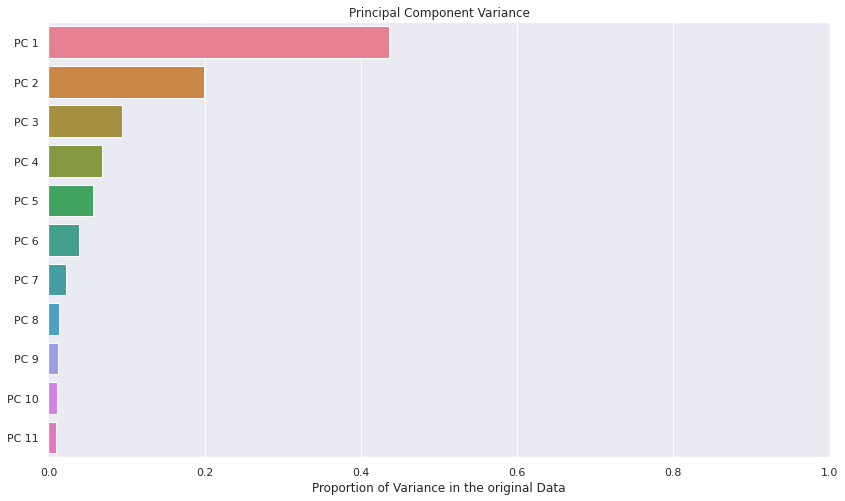

PC 1: 43.62845298249761 %
PC 2: 19.88834502312557 %
PC 3: 9.450317444479541 %
PC 4: 6.894125201681846 %
PC 5: 5.646790056059688 %
PC 6: 3.903253026121914 %
PC 7: 2.218605527248634 %
PC 8: 1.4013350631641341 %
PC 9: 1.2586144774022154 %
PC 10: 1.0941752699446643 %
PC 11: 0.9564905121587477 %
Total sum of Variance %: 	 96.34050458388457


In [27]:
# plot variance of each PC
# pca.explained_variance_ratio_
# = shows the % of variance in the original data 
# that is captured by each individual component
plt.figure(figsize=(14,8))
seaborn.barplot(x=pca.explained_variance_ratio_,
            y=['PC ' + str(i + 1) for i in range(n_components)],
            orient='h', palette='husl')
plt.xlim(0,1)
plt.xlabel("Proportion of Variance in the original Data")
plt.title("Principal Component Variance")
plt.show()

for i in range(n_components):
    print("PC " + str(i + 1) +str(": ") + str(pca.explained_variance_ratio_[i] * 100) + str(" %"))
print("Total sum of Variance %: \t", pca.explained_variance_ratio_.sum()*100)

PC 1 captures the direction of greatest variance in the original data in 30 dimensional space 43,6%

PC 2 second greatest variance 19.8%

PC 3 ...

Train on pca Data with optimized logistic Regression

In [28]:
lr_best_pca = LogisticRegression(C=0.5,penalty='l2',solver='lbfgs')
lr_best_pca.fit(pc_train,y_train)
y_pred_pca = lr_best_pca.predict(pc_test)
print_score(y_test,y_pred_pca)

Accuracy %: 	 97.2972972972973
Recall %: 	 98.07692307692307
Precision %: 	 96.22641509433963


# Random Forest

In [29]:
print("Standard RF without CV\n")
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print_score(y_test,y_pred_rf)

Standard RF without CV

Accuracy %: 	 98.1981981981982
Recall %: 	 98.07692307692307
Precision %: 	 98.07692307692307


In [30]:
print("Standard RF with CV\n")


pipe_std = Pipeline([('scaler', StandardScaler()),
                     ('rf_std', RandomForestClassifier(random_state=0))])


accuracy = cross_val_score(pipe_std, X_train, y_train, scoring='accuracy', cv=cv)
precision = cross_val_score(pipe_std, X_train, y_train, scoring="precision",cv=cv)
recall = cross_val_score(pipe_std, X_train, y_train, scoring="recall",cv=cv)
print_score_cv(accuracy,precision,recall)

Standard RF with CV

Mean Accuracy %:	 93.64163972965031
Mean Recall %:	 88.79310344827587
Mean Precision %:	 92.5858147229115


## Parameter Optimierung RF

In [67]:
pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

param_grid = { 
    'rf__n_estimators': [50, 100, 200, 500],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [4,5,6,7,8],
    'rf__criterion' :['gini', 'entropy'],
    'rf__bootstrap' : [True],
    'rf__oob_score' : [True, False],
    'rf__ccp_alpha' : [0.0,0.01,0.5,1],
    'rf__random_state' : [0]
}

gridSearch_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, 
                          scoring='accuracy', cv=cv,
                    return_train_score=True , verbose=True, n_jobs=-1)


gridSearch_rf.fit(X_train,y_train)

# getting the best parameters
best_para = gridSearch_rf.best_params_
print("The best parameters are: \t", best_para)
print("Best Score %: \t", gridSearch_rf.best_score_*100)
pd.DataFrame(gridSearch_rf.cv_results_).loc[:, ['mean_test_score', 'rank_test_score', 'params']].sort_values(by='rank_test_score').head()

Fitting 4 folds for each of 960 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.3min


The best parameters are: 	 {'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__criterion': 'entropy', 'rf__max_depth': 5, 'rf__max_features': 'log2', 'rf__n_estimators': 50, 'rf__oob_score': True, 'rf__random_state': 0}
Best Score %: 	 95.75374669409345


[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  6.2min finished


,mean_test_score,rank_test_score,params
161,0.957537,1,"{'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, ..."
160,0.957537,1,"{'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, ..."
233,0.954562,3,"{'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, ..."
185,0.954562,3,"{'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, ..."
425,0.954562,3,"{'rf__bootstrap': True, 'rf__ccp_alpha': 0.01,..."


In [31]:
print("Optimised RF without CV\n")

rf_best = RandomForestClassifier(criterion='entropy',max_depth=5,max_features='log2',
                                n_estimators=50,bootstrap=True,ccp_alpha=0.0,
                                 oob_score=True,random_state=0)

rf_best.fit(X_train_scaled,y_train)
y_pred_rf = rf_best.predict(X_test_scaled)
print("Confusion Matrix:")
cm = confusion_matrix(y_test,y_pred_rf)
print(cm)
print_score(y_test,y_pred_rf)

Optimised RF without CV

Confusion Matrix:
[[58  1]
 [ 1 51]]
Accuracy %: 	 98.1981981981982
Recall %: 	 98.07692307692307
Precision %: 	 98.07692307692307


In [32]:
print("Optimised RF with CV\n")


pipe_std = Pipeline([('scaler', StandardScaler()),
                     ('rf_std', RandomForestClassifier(criterion='entropy',max_depth=5,max_features='log2',
                                n_estimators=50,bootstrap=True,ccp_alpha=0.0,
                                 oob_score=True,random_state=0))])


accuracy = cross_val_score(pipe_std, X_train, y_train, scoring='accuracy', cv=cv)
precision = cross_val_score(pipe_std, X_train, y_train, scoring="precision",cv=cv)
recall = cross_val_score(pipe_std, X_train, y_train, scoring="recall",cv=cv)
print_score_cv(accuracy,precision,recall)

Optimised RF with CV

Mean Accuracy %:	 95.75374669409345
Mean Recall %:	 92.24137931034483
Mean Precision %:	 95.3809523809524


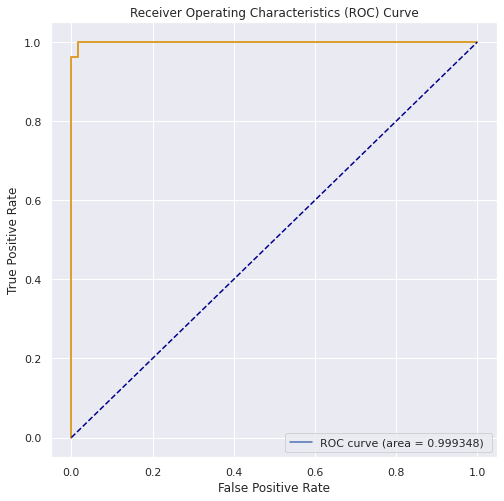

AUC Score: 	 0.9993481095176011
TPR: 	 [0.         0.44230769 0.51923077 0.55769231 0.59615385 0.96153846
 0.96153846 1.         1.         1.         1.         1.
 1.        ]
FPR: 	 [0.         0.         0.         0.         0.         0.
 0.01694915 0.01694915 0.52542373 0.55932203 0.84745763 0.89830508
 1.        ]


In [33]:
proba_rf_class_1 = rf_best.predict_proba(X_test_scaled)[:,1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, proba_rf_class_1)
plot_my_roc_curve(fpr_rf,tpr_rf,y_test,proba_rf_class_1)
print("AUC Score: \t", roc_auc_score(y_test, proba_rf_class_1))
print("TPR: \t", tpr_rf)
print("FPR: \t", fpr_rf)

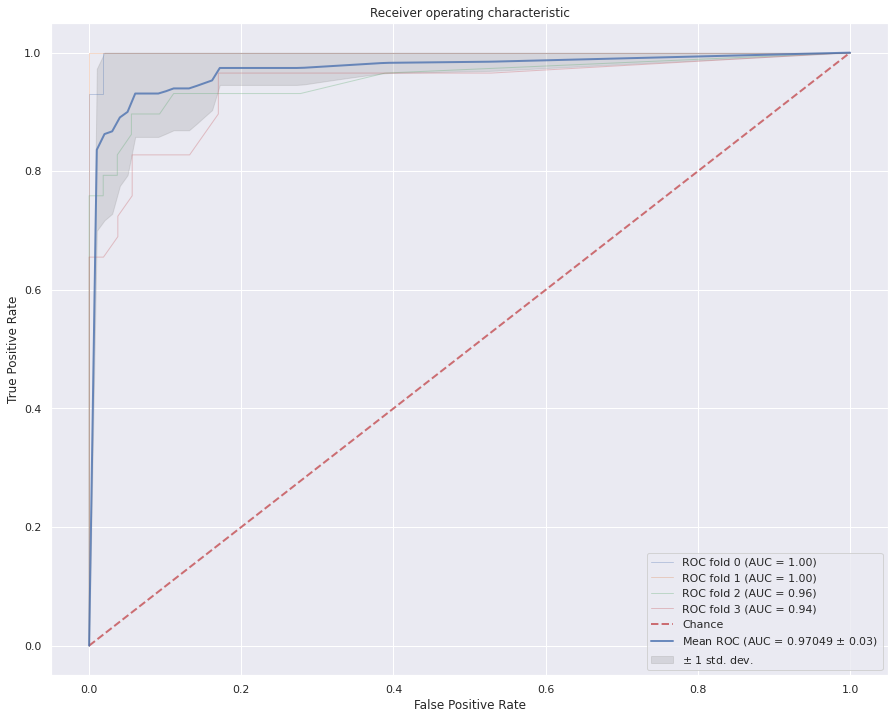

In [34]:
# roc plot using cross validation
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
pipe_rf_best = Pipeline([('scaler', StandardScaler()),
                     ('rf_std', RandomForestClassifier(criterion='entropy',
                                                       max_depth=8,max_features='log2',
                                n_estimators=50,bootstrap=True,ccp_alpha=0.0,
                                 oob_score=True,random_state=42))])

X_train_ = X_train.values
y_train_ = y_train.values
tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_train_, y_train_)):
    pipe_rf_best.fit(X_train_[train], y_train_[train])
    viz = plot_roc_curve(pipe_rf_best, X_train_[test], y_train_[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr_rf = np.interp(mean_fpr_rf, viz.fpr, viz.tpr)
    interp_tpr_rf[0] = 0.0
    tprs_rf.append(interp_tpr_rf)
    aucs_rf.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_tpr_rf[-1] = 1.0
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_auc_rf = np.std(aucs_rf)
ax.plot(mean_fpr_rf, mean_tpr_rf, color='b',
        label=r'Mean ROC (AUC = %0.5f $\pm$ %0.2f)' % (mean_auc_rf, std_auc_rf),
        lw=2, alpha=.8)

std_tpr_rf = np.std(tprs_rf, axis=0)
tprs_upper_rf = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower_rf = np.maximum(mean_tpr_rf - std_tpr_rf, 0)
ax.fill_between(mean_fpr_rf, tprs_lower_rf, tprs_upper_rf, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()

# Zusammenfassung der Ergebnisse von LR und RF

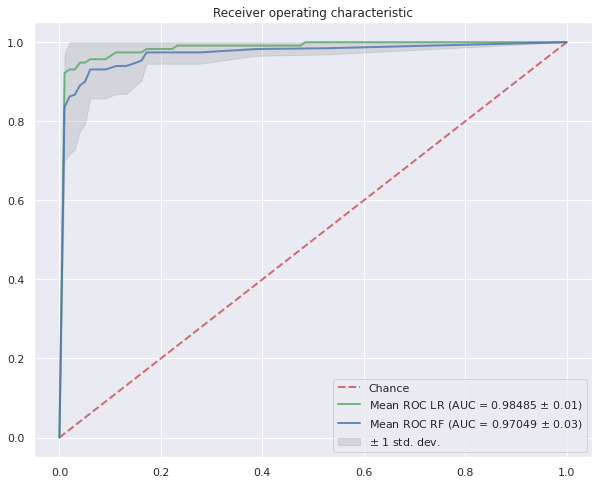

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.plot(mean_fpr, mean_tpr, color='g',
        label=r'Mean ROC LR (AUC = %0.5f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

ax.plot(mean_fpr_rf, mean_tpr_rf,color='b',
        label=r'Mean ROC RF (AUC = %0.5f $\pm$ %0.2f)' % (mean_auc_rf, std_auc_rf),
        lw=2, alpha=.8)
ax.fill_between(mean_fpr_rf, tprs_lower_rf, tprs_upper_rf, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()

# Evaluation auf der Testmenge

In [37]:
df_test = pd.read_csv('test.csv', encoding='utf-8')


##### ONLY IF NEEDED #####
# only if "id" is still in test.csv
df_test = df_test.drop(['id'],axis=1)
# split test.csv in X and y if needed
y_final_test = df_test.label.values
X_final_test = df_test.drop(['label'],axis=1).values
##########################

# feature scaling the same as used before
X_final_test = scaler.transform(X_final_test)


# Logistische Regression improved
print("Optimised LR:")
y_pred_lr = lr_best.predict(X_final_test)
print_score(y_final_test,y_pred_lr)

print()
# Random Forest improved
print("Optimised RF:")
y_pred_rf = rf_best.predict(X_final_test)
print_score(y_final_test,y_pred_rf)

Optimised LR:
Accuracy %: 	 99.21259842519686
Recall %: 	 97.72727272727273
Precision %: 	 100.0

Optimised RF:
Accuracy %: 	 96.8503937007874
Recall %: 	 93.18181818181817
Precision %: 	 97.61904761904762


In [38]:
y_test_true = y_final_test

In [39]:
y_test_prob_class_1 = lr_best.predict_proba(X_final_test)[:,1]

In [40]:
# This is the ROC-AUC evaluation metric for the test data set:
print("AUC score: \t", roc_auc_score(y_test_true, y_test_prob_class_1))
print_score(y_test_true,y_final_predicted)

AUC score: 	 0.9986308871851041


NameError: name 'y_final_predicted' is not defined